In [2]:
# 1 - 데이터 준비

from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


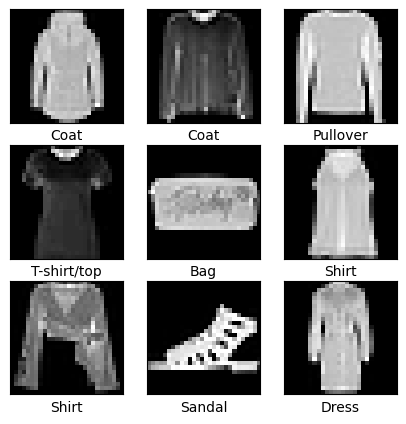

In [3]:
# 2 - 데이터 그리기

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])
plt.show()

In [4]:
# 2 - 전처리 및 검증 데이터셋 생성

# 값의 범위를 0 ~ 255 -> 0 ~ 1 사이로 스케일링
X_train = X_train / 255
X_test = X_test / 255

# 실제 정답을 비교할 수 있는(다중분류) -> 수치형을 범주형으로 변경
from tensorflow.keras.utils import to_categorical
# 실제 정답 비교를 위해 0 ~ 9 정답지를 따로 저장
real_y_test = y_test

# 레이블 데이터를 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# 3 - 훈련

from sklearn.model_selection import train_test_split

# 검증 데이터를 70:30 비율로 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=777)

In [6]:
# 4 - 첫 번째 모델

from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape=(28,28))) # Flatten(28,28) -> (28*28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

first_history = first_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

c:\Users\jmw31\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.6612 - loss: 0.9980 - val_acc: 0.8367 - val_loss: 0.4830
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8405 - loss: 0.4602 - val_acc: 0.8564 - val_loss: 0.4198
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8581 - loss: 0.4033 - val_acc: 0.8613 - val_loss: 0.3925
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8599 - loss: 0.3929 - val_acc: 0.8551 - val_loss: 0.4128
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8709 - loss: 0.3606 - val_acc: 0.8648 - val_loss: 0.3810
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8737 - loss: 0.3463 - val_acc: 0.8711 - val_loss: 0.3542
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8827 - loss: 0.3262 - val_acc: 0.8753 - val_loss: 0.3552
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8856 - loss: 0.3150 - val_acc: 0.8784 - val_loss: 0.3370
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

In [7]:
# 5 - 두 번째 모델

from keras.models import Sequential
from keras.layers import Dense, Flatten

second_model = Sequential()
second_model.add(Flatten(input_shape=(28,28))) # Flatten(28,28) -> (28*28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 층 하나 추가
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax'))

second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

second_history = second_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.6829 - loss: 0.9113 - val_acc: 0.8332 - val_loss: 0.4619
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8473 - loss: 0.4387 - val_acc: 0.8625 - val_loss: 0.3937
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8603 - loss: 0.3853 - val_acc: 0.8606 - val_loss: 0.3954
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8703 - loss: 0.3574 - val_acc: 0.8766 - val_loss: 0.3475
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8792 - loss: 0.3290 - val_acc: 0.8762 - val_loss: 0.3427
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.8798 - loss: 0.3242 - val_acc: 0.8741 - val_loss: 0.3521
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8873 - loss: 0.3050 - val_acc: 0.8748 - val_loss: 0.3446
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.8905 - loss: 0.2923 - val_acc: 0.8861 - val_loss: 0.3249
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

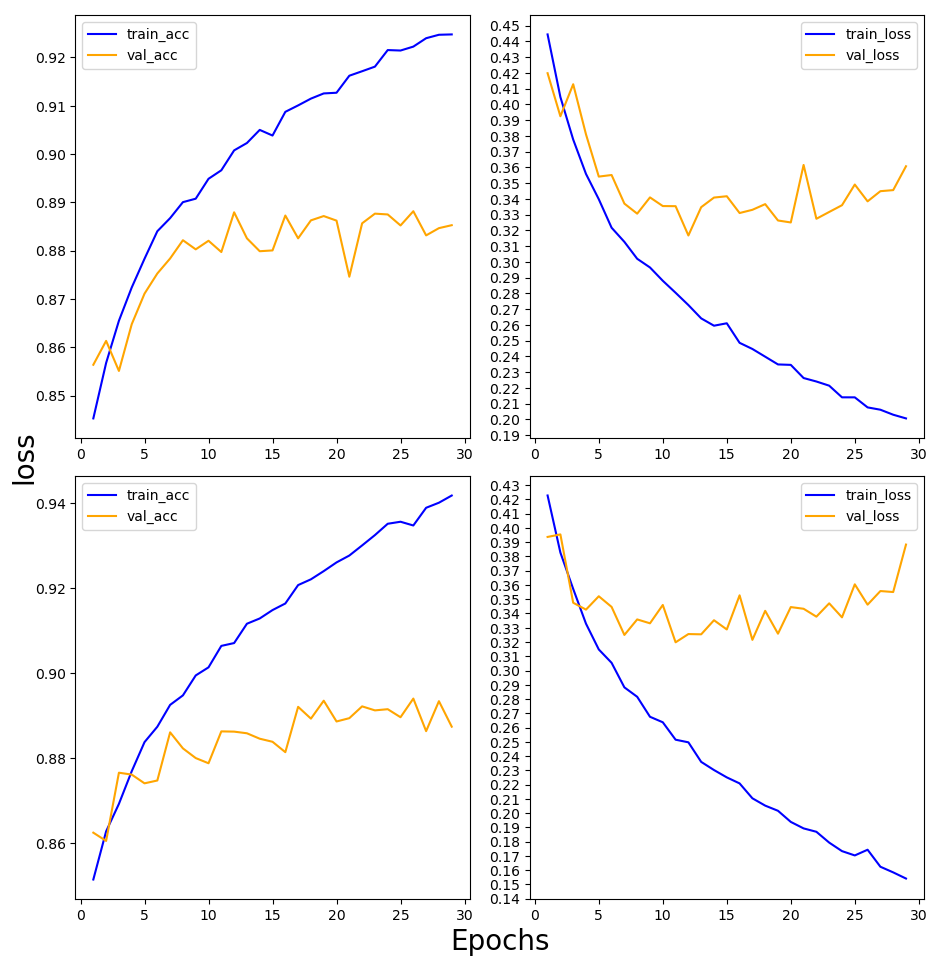

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8742 - loss: 0.4050
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8778 - loss: 0.4378


[0.43570879101753235, 0.8763999938964844]

In [8]:
# 6 - 학습 결과

import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

# 결과 평가
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


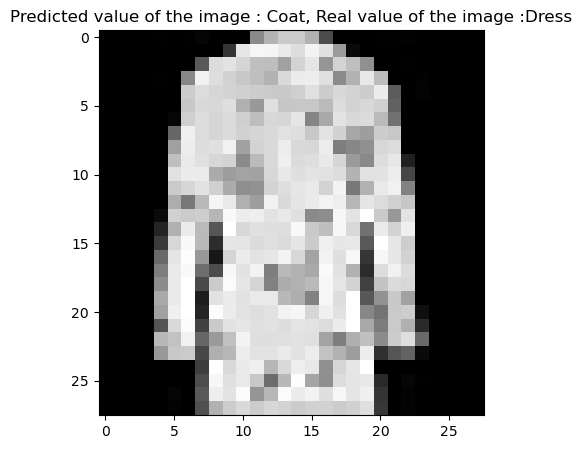

In [17]:
# 7 - 모델 예측하여 그리기

import numpy as np

results = first_model.predict(X_test)
arg_results = np.argmax(results, axis = -1)

random_idx = np.random.randint(10000)

plt.figure(figsize=(5,5))

plt.imshow(X_test[random_idx], cmap='gray')
plt.title('Predicted value of the image : ' + class_names[arg_results[random_idx]] + ', Real value of the image :' + class_names[real_y_test[random_idx]])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


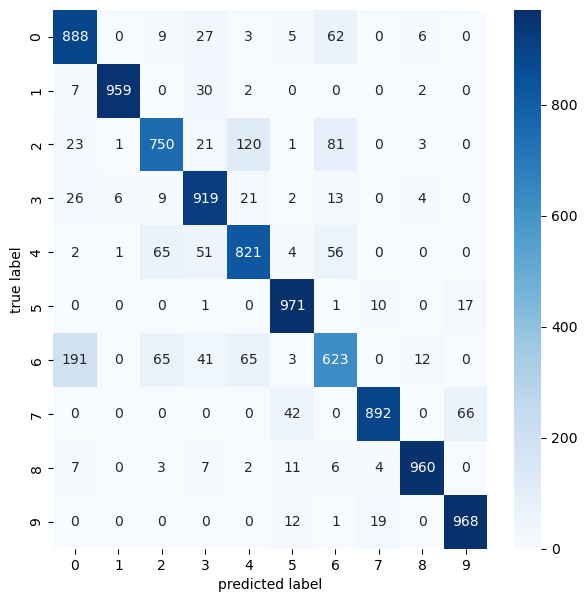

In [10]:
# 모델 평가 - 혼동 행렬

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
results = first_model.predict(X_test)

plt.figure(figsize=(7,7))

cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1)) # 실제 정답과 비교
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()